<h1> SVM for Kdd99 dataset (10%)</h1>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Since the dataset has no header so we add header because we do data manipulations using column names
cols ="""duration, 
protocol_type, 
service, 
flag, 
src_bytes, 
dst_bytes, 
land, 
wrong_fragment, 
urgent, 
hot, 
num_failed_logins, 
logged_in, 
num_compromised, 
root_shell, 
su_attempted, 
num_root, 
num_file_creations, 
num_shells, 
num_access_files, 
num_outbound_cmds, 
is_host_login, 
is_guest_login, 
count, 
srv_count, 
serror_rate, 
srv_serror_rate, 
rerror_rate, 
srv_rerror_rate, 
same_srv_rate, 
diff_srv_rate, 
srv_diff_host_rate, 
dst_host_count, 
dst_host_srv_count, 
dst_host_same_srv_rate, 
dst_host_diff_srv_rate, 
dst_host_same_src_port_rate, 
dst_host_srv_diff_host_rate, 
dst_host_serror_rate, 
dst_host_srv_serror_rate, 
dst_host_rerror_rate, 
dst_host_srv_rerror_rate, 
target"""
  
columns =[] 
for c in cols.split(', '): 
    if(c.strip()):
        columns.append(c.strip()) 
print(len(columns)) 

42


In [3]:
#Making a dictionary with target, attack_type as key,value pairs to split in dos vs not dos class
attacks_types = { 
'normal': 1, 
'back': 0, 
'buffer_overflow': 1, 
'ftp_write': 1, 
'guess_passwd': 1, 
'imap': 1, 
'ipsweep': 1, 
'land': 0, 
'loadmodule': 1, 
'multihop': 1, 
'neptune': 0, 
'nmap': 1, 
'perl': 1, 
'phf': 1, 
'pod': 0, 
'portsweep': 1, 
'rootkit': 1, 
'satan': 1, 
'smurf': 0, 
'spy': 1, 
'teardrop': 0, 
'warezclient': 1, 
'warezmaster': 1, 
} 

In [4]:
#Reading the csv and making a dataframe from the data
kdd = pd.read_csv(r"C:\Users\myste\Documents\MSCS\Fall 2020\ML\kddcup.data_10_percent.gz", names = columns) 
#Using the above dictionary to add Attack Type as another value for classification and priting a few values
kdd['attack_type'] = kdd.target.apply(lambda x:attacks_types[x[:-1]]) 
kdd.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


In [5]:
#printing the size of the dos vs not dos values
print(len(kdd[kdd['attack_type'] == 1]))
print(len(kdd[kdd['attack_type'] == 0]))

102563
391458


In [6]:
kdd

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,1
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,1
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,1
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,1


In [7]:
#Dropping target column because we have to focus on attack types
kdd = kdd.drop(['target', ], axis = 1)
kdd.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type'],
      dtype='object')

<h2>Label encoding for all not numerical values</h2>

In [8]:
#label encoding for protocol type
kdd["protocol_type"] = kdd["protocol_type"].astype('category')
kdd["protocol_type"] = kdd["protocol_type"].cat.codes
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,1,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1
1,0,1,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1
2,0,1,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
3,0,1,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
4,0,1,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,1


In [9]:
#label encoding for service type
kdd["service"] = kdd["service"].astype('category')
kdd["service"] = kdd["service"].cat.codes
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,1,22,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1
1,0,1,22,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1
2,0,1,22,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
3,0,1,22,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
4,0,1,22,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,1


In [10]:
#label encoding for flag type
kdd["flag"] = kdd["flag"].astype('category')
kdd["flag"] = kdd["flag"].cat.codes
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,1


In [11]:
#Putting attack_type as the target output and all the other columns as features for training in X
y_init = kdd[['attack_type']] 
X_init = kdd.drop(['attack_type', ], axis = 1)
print(y_init.shape, X_init.shape)

(494021, 1) (494021, 41)


<h2>Undersampling the data</h2>

In [12]:
#Undersampling the data because it is unbalanced
print('Original dataset shape %s' % Counter(y_init))
y_init=y_init.astype('int')
undersample = RandomUnderSampler(sampling_strategy='all')
X, y = undersample.fit_resample(X_init, y_init)
print('Resampled dataset shape %s' % Counter(y))
print(y.shape, X.shape)

Original dataset shape Counter({'attack_type': 1})
Resampled dataset shape Counter({'attack_type': 1})
(205126, 1) (205126, 41)


<h2>Scaling the values for features</h2>

In [13]:
#Scaling the X values for the the data so that it can be passed for training the model
scaled = MinMaxScaler() 
X = scaled.fit_transform(X) 

<h2>Spltting the data into test and train (20:80)</h2>

In [14]:
#Splitting the data into testing and training using a randomly generated random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = np.random)
y_test=y_test.astype('int')
y_train=y_train.astype('int')
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(164100, 41) (164100, 1)
(41026, 41) (41026, 1)


<h2>SVM with all features and Linear kernel</h2>

Accuracy: 0.996636279432555
Weights :  [[  1.73347405   2.85891065   0.0874773    1.32195228   1.07425896
    0.58852856  -2.          -7.84707321   0.         -12.87660217
    2.08091965  -0.31831742  -0.42307583   1.           0.28578362
    0.05783424   0.94288976   0.5          0.75         0.
    0.          11.37481738  -1.96528934  -0.66773669   0.08982368
   -0.65097848   2.04918007  -1.23838757   2.88591245   2.91256574
    0.3180566   -1.24632144   0.9024824   -1.76887174   2.4706038
    0.86353076   0.05001584  -1.536284    -0.92352684  -1.09982978
    0.47347769]]


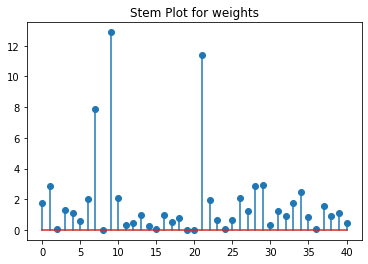

In [15]:
svc=svm.SVC(probability=False, kernel="linear")
svc.fit(X_train,y_train)
print("Accuracy:", metrics.accuracy_score(svc.predict(X_test), y_test))
print("Weights : ",svc.coef_)
weights=abs(svc.coef_.flatten())
plt.stem(weights)
plt.title("Stem Plot for weights")
plt.show()

<h2>SVM with all features and RBF kernel</h2>

In [16]:
svc=svm.SVC(probability=False, kernel="rbf")
svc.fit(X_train,y_train)
print("Accuracy:", metrics.accuracy_score(svc.predict(X_test), y_test))

Accuracy: 0.9971237751669673


<h2>SVM with all features and Polynomial kernel</h2>

In [17]:
svc=svm.SVC(probability=False, kernel="poly")
svc.fit(X_train,y_train)
print("Accuracy:", metrics.accuracy_score(svc.predict(X_test), y_test))

Accuracy: 0.998220640569395


<h2>SVM with all features and Sigmoid kernel</h2>

In [18]:
svc=svm.SVC(probability=False, kernel="sigmoid")
svc.fit(X_train,y_train)
print("Accuracy:", metrics.accuracy_score(svc.predict(X_test), y_test))

Accuracy: 0.9716033734704821


<h3>Looking at the weights for the linear classifier it is clear that 'hot'(10th column) and 'is_guest_login'(22nd column) are the 2 most important features so I will be using those for the training</h3>

In [19]:
#Subsampling the data to contain only 1000 values for better visualization
from sklearn.datasets import make_classification
X_train2f = X_train[:, [9, 21]]
X_test2f = X_test[:, [9, 21]]
X_train2f, y_train = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=103)
X_test2f, y_test = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=103)
print(X_test2f.shape, X_train2f.shape, y_train.shape, y_test.shape)

(1000, 2) (1000, 2) (1000,) (1000,)


In [20]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
 # Setup marker generator and color map
    markers = ('o', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
 # Setting up the min and max, then generating a grid according to them. 
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
 # Predicting the surfce using the classifier and reshaping the grid according to it.
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
 # Plotting the class samples on the grid
    plt.contourf(xx1, xx2, Z, alpha=0.05, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

Accuracy: 0.968


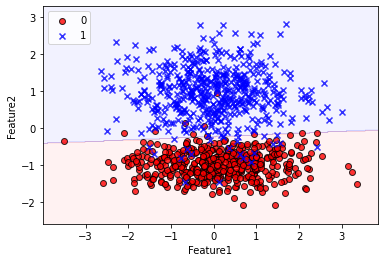

In [21]:
svc=svm.SVC(probability=False, kernel="linear")
svc.fit(X_train2f,y_train)
print("Accuracy:", metrics.accuracy_score(svc.predict(X_test2f), y_test))
#Plotting the decision surface for linear kernel
plot_decision_regions(X_test2f, y_test, classifier=svc)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

Accuracy: 0.972


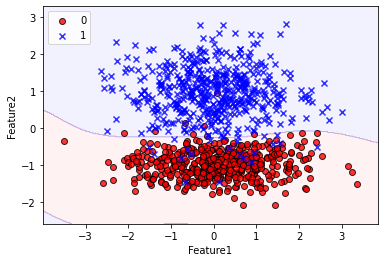

In [22]:
svc=svm.SVC(probability=False, kernel="rbf")
svc.fit(X_train2f,y_train)
print("Accuracy:", metrics.accuracy_score(svc.predict(X_test2f), y_test))
#Plotting the decision surface for rbf kernel
plot_decision_regions(X_test2f, y_test, classifier=svc)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

<h3>As we from above can see that the accuracy for linear model is 0.968 but the accuracy for rbf is slightly better at 0.972. Since the data is not linearly separable - linear kernel, although, doing a good job still can't separate it as well as rbf. This is because rbf creates non-linear combinations of the features to uplift samples onto a higher-dimensional feature space where it uses a linear decision boundary to separate the classes.</h3>

<h1>Result comparisions for all 4 kernels</h1>

<h3> Accuracy values: Polynomial > RBF > Linear > Sigmoid</h3>

In [23]:
results = {'Kernel': ['Linear','RBF','Polynomial','Sigmoid'],
        'Accuracy': [0.9966,0.9971,0.9982,0.9716]
        }
df = pd.DataFrame(results, columns = ['Kernel', 'Accuracy'])
df

,Kernel,Accuracy
0,Linear,0.9966
1,RBF,0.9971
2,Polynomial,0.9982
3,Sigmoid,0.9716


<h1>Pros and Cons of using different Kernels</h1>
<br>
<h3>1. Linear Kernel - It is prefered when the data is linearly separable. We prefer linear kernel because it can be used when there are a large number of features. Training with linear kernel is also very fast compared to the other kernels as it is a parametric model. It also does not give a very bad complexity even when the classes are not linearly separable unless they are distributed in a very scattered manner. The tradeoff for the accuracy and time is worth it.</h3>
<br>
<h3>2. RBF Kernel - The complexity of rbf grows with the size of the training set. It more expensive to train an RBF in SVM. This is because the projection into the higher dimensional space where the data becomes linearly separable is more expensive as well during prediction. But because of this very reason the predication accuracies are better and we are even able to get clear decision boundries in many cases.</h3>
<br>
<h3>2. Polynomial Kernel - These are best used for problems where all the training data is normalized. It is used with kernels that represents the similarity of vectors in a feature space over polynomials of the original variables, allowing learning of non-linear models. This kernel is very widely used for applications related to natural language processing. The time complexity of this kernel is also high.</h3>
<br>
<h3>2. Sigmoid Kernel - The most complex, sigmoid kernel function is equivalent to a two-layer, perceptron neural network. 
This kernel was quite popular for support vector machines due to its origin from neural network theory. Also, despite being only conditionally positive definite, it has been found to perform well in practice.
and the behavior is unknown. We can use it as the proxy for neural networks. </h3>